In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [7]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1070, 9)
Test shape: (268, 9)


In [9]:
lr_lstat = linear_model.LinearRegression()

lr_lstat.fit(X_train, y_train)
print(f'w0: {lr_lstat.intercept_.round(2)}')
print(f'w1: {lr_lstat.coef_}')

w0: -12390.8
w1: [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


In [11]:
y_train_pred = lr_lstat.predict(X_train)
y_test_pred = lr_lstat.predict(X_test)

In [20]:
print(f'Train R^2: {metrics.r2_score(y_train, y_train_pred).round(3)}')
print(f'Train R^2: {metrics.mean_absolute_error(y_train, y_train_pred).round(0)}')
print(f'Train R^2: {(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100).round(0)}')

Train R^2: 0.742
Train R^2: 4208.0
Train R^2: 42.0


In [21]:
print(f'Test R^2: {metrics.r2_score(y_test, y_test_pred).round(3)}')
print(f'Test R^2: {metrics.mean_absolute_error(y_test, y_test_pred).round(0)}')
print(f'Test R^2: {(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100).round(0)}')

Test R^2: 0.784
Test R^2: 4181.0
Test R^2: 47.0


Text(0, 0.5, 'Model')

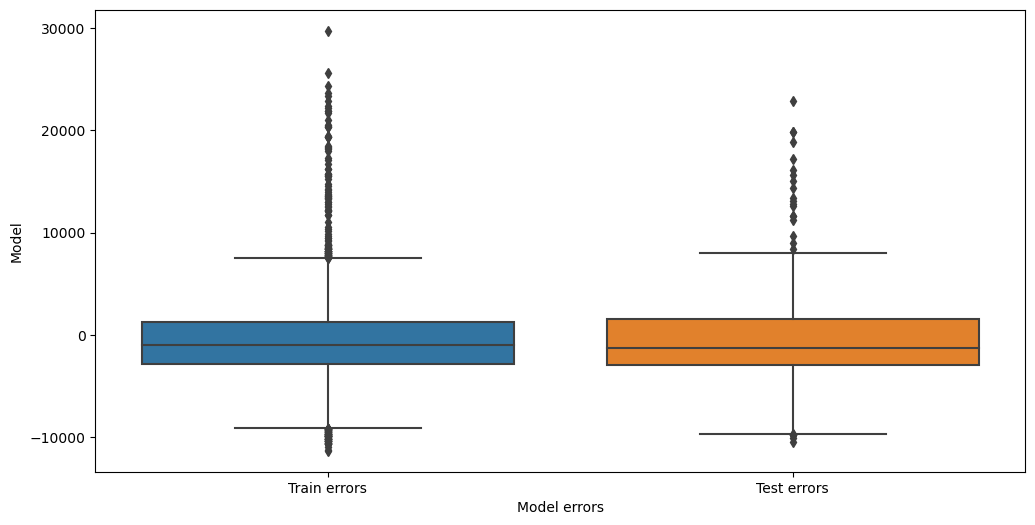

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred

predict_df = pd.DataFrame(
    {'Train errors': y_train_errors,
    'Test errors': y_test_errors}
)

sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model')